# Isolation forest outlier method trained on normalized barrier, distance, chi-1_fa and S-2_fa variables

In [1]:
import matplotlib.pyplot as plt 
import csv 
import pandas as pd 
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
import seaborn as sns

Read CSV data into panda DataFrame "distance_barrier", print first five rows and plot the data in a scatterplot:

   chi-1_fa   S-2_fa  distance  barrier
0   564.775  72.0370    0.9348     14.8
1   482.135  57.4704    0.9699     12.4
2   670.614  89.7068    0.9983      5.2
3   354.089  49.8734    0.9353     10.5
4   472.145  60.6480    0.9310      9.4


<Axes: xlabel='distance', ylabel='barrier'>

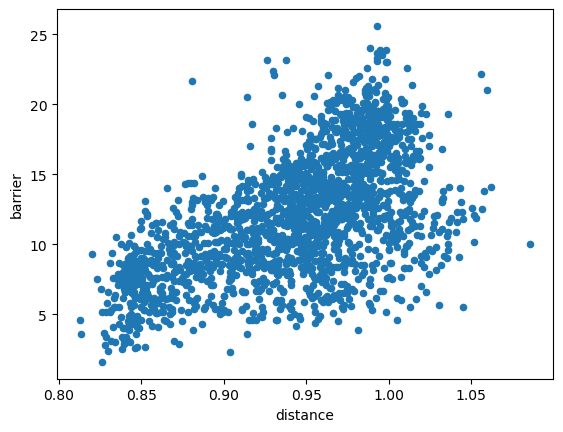

In [2]:
distance_barrier = pd.read_csv("data/vaskas_features_properties_smiles_filenames.csv", usecols=[1, 26, 90, 91])
print(distance_barrier.head())
distance_barrier.plot(kind='scatter', x='distance', y='barrier')


#plt.show()

<Axes: xlabel='chi-1_fa', ylabel='barrier'>

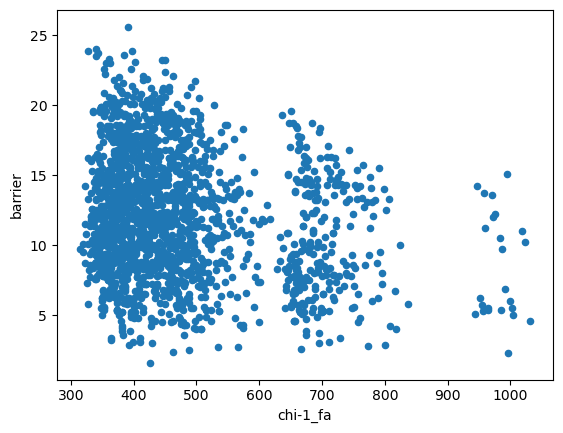

In [3]:
distance_barrier.plot(kind='scatter', x='chi-1_fa', y='barrier')


<Axes: xlabel='S-2_fa', ylabel='barrier'>

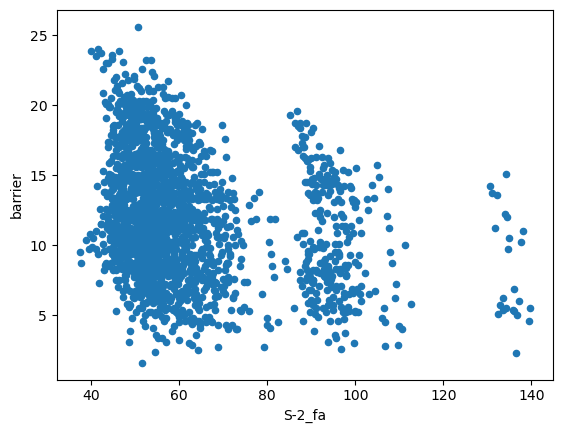

In [4]:
distance_barrier.plot(kind='scatter', x='S-2_fa', y='barrier')

In [5]:
distance_barrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chi-1_fa  1947 non-null   float64
 1   S-2_fa    1947 non-null   float64
 2   distance  1947 non-null   float64
 3   barrier   1947 non-null   float64
dtypes: float64(4)
memory usage: 61.0 KB


Normalization of entire Data Frame before fitting Isolation Forest model:

In [6]:
print(distance_barrier.head())
min_max_scaler = preprocessing.MinMaxScaler()
distance_barrier_scaled = min_max_scaler.fit_transform(distance_barrier)
scaled = pd.DataFrame(distance_barrier_scaled, columns = distance_barrier.columns)
print(scaled.head())

   chi-1_fa   S-2_fa  distance  barrier
0   564.775  72.0370    0.9348     14.8
1   482.135  57.4704    0.9699     12.4
2   670.614  89.7068    0.9983      5.2
3   354.089  49.8734    0.9353     10.5
4   472.145  60.6480    0.9310      9.4
   chi-1_fa    S-2_fa  distance   barrier
0  0.349373  0.338506  0.446964  0.550000
1  0.234254  0.196349  0.575347  0.450000
2  0.496808  0.510948  0.679225  0.150000
3  0.055885  0.122209  0.448793  0.370833
4  0.220338  0.227360  0.433065  0.325000


Define variables for the isolation forest model and fit it to the data. Set contamination percentage = percentage of outliers. Define anomaly scores (continuous variable) and anomaly score (descrete variable [1, -1]). 

In [7]:

anomaly_inputs = ['distance', 'barrier', 'S-2_fa', 'chi-1_fa']
model_IF = IsolationForest(contamination=0.02, random_state=42)
model_IF.fit(scaled[anomaly_inputs])
scaled['anomaly_scores'] = model_IF.decision_function(scaled[anomaly_inputs])
scaled['anomaly'] = model_IF.predict(scaled[anomaly_inputs])

In [8]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chi-1_fa        1947 non-null   float64
 1   S-2_fa          1947 non-null   float64
 2   distance        1947 non-null   float64
 3   barrier         1947 non-null   float64
 4   anomaly_scores  1947 non-null   float64
 5   anomaly         1947 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 91.4 KB


In [9]:
scaled.loc[:, ['distance', 'barrier', 'chi-1_fa', 'S-2_fa', 'anomaly_scores', 'anomaly'] ]

,distance,barrier,chi-1_fa,S-2_fa,anomaly_scores,anomaly
0,0.446964,0.550000,0.349373,0.338506,0.125257,1
1,0.575347,0.450000,0.234254,0.196349,0.212703,1
2,0.679225,0.150000,0.496808,0.510948,0.054451,1
3,0.448793,0.370833,0.055885,0.122209,0.203709,1
4,0.433065,0.325000,0.220338,0.227360,0.214488,1
...,...,...,...,...,...,...
1942,0.478786,0.554167,0.236717,0.253411,0.195869,1
1943,0.567301,0.504167,0.109578,0.169157,0.224298,1
1944,0.460132,0.583333,0.505262,0.511336,0.092060,1
1945,0.566203,0.479167,0.591225,0.563670,0.104139,1


Define a function with Seaborn to plot outliers and inliers in scatterplots, where the anomaly_score is color coded. 

In [10]:
def outlier_plot(data, outlier_method_name, x_var, y_var, h_var, s_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name} (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly']==1])}")
    print(f"Total number of values: {len(data)}")

    g = sns.relplot(data=data, x=x_var, y=y_var, col='anomaly', hue=h_var, size=s_var) 
    g.figure.suptitle(f'Outlier method: {outlier_method_name} (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly']== 1])} points")
    return g
    
    

Outlier Method: Isolation Forest (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 39
Number of non anomalous values 1908
Total number of values: 1947


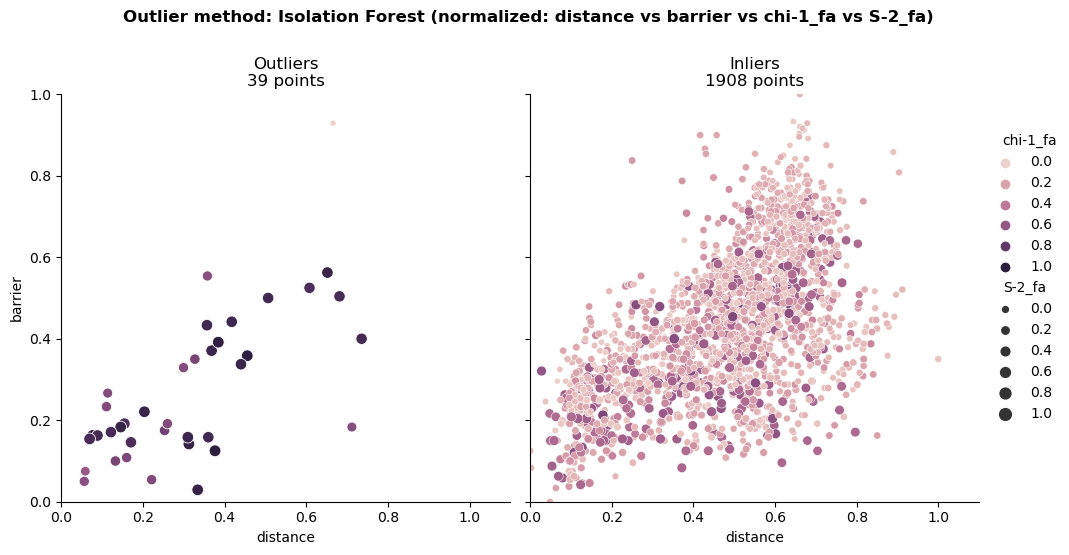

In [11]:
outlier_plot(scaled, "Isolation Forest", "distance", "barrier", "chi-1_fa", "S-2_fa", [0, 1.1], [0, 1])

The selected outliers are the same in the above image with normalazied data as in the non-normalized data. This siuggests the isolation forest method in SciKit automatically normalizes  each vector and a separate normalization step is not needed. 

Outlier Method: Isolation Forest (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 39
Number of non anomalous values 1908
Total number of values: 1947


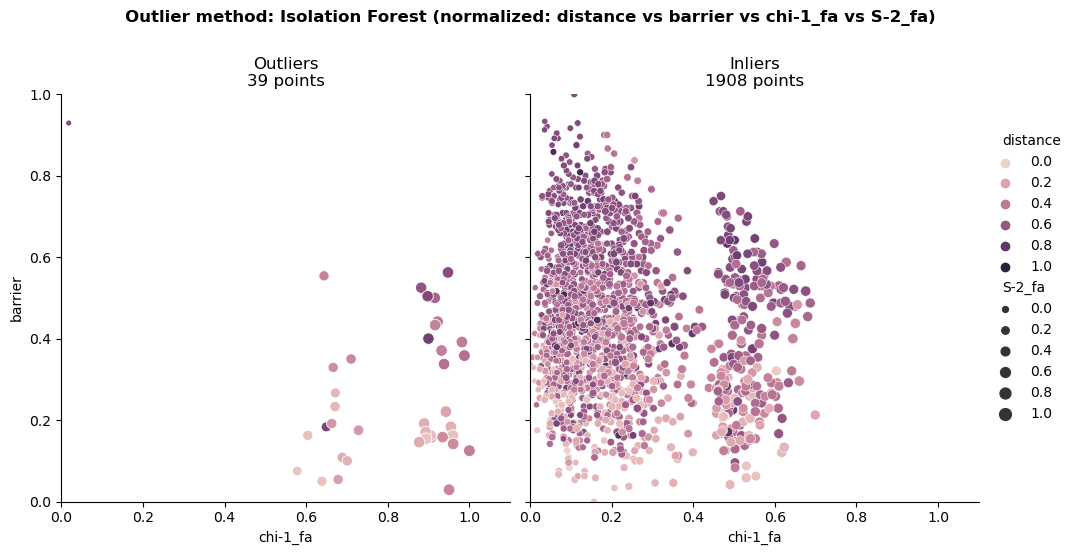

In [12]:
outlier_plot(scaled, "Isolation Forest", "chi-1_fa", "barrier", "distance", "S-2_fa", [0, 1.1], [0, 1])

Outlier Method: Isolation Forest (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 39
Number of non anomalous values 1908
Total number of values: 1947


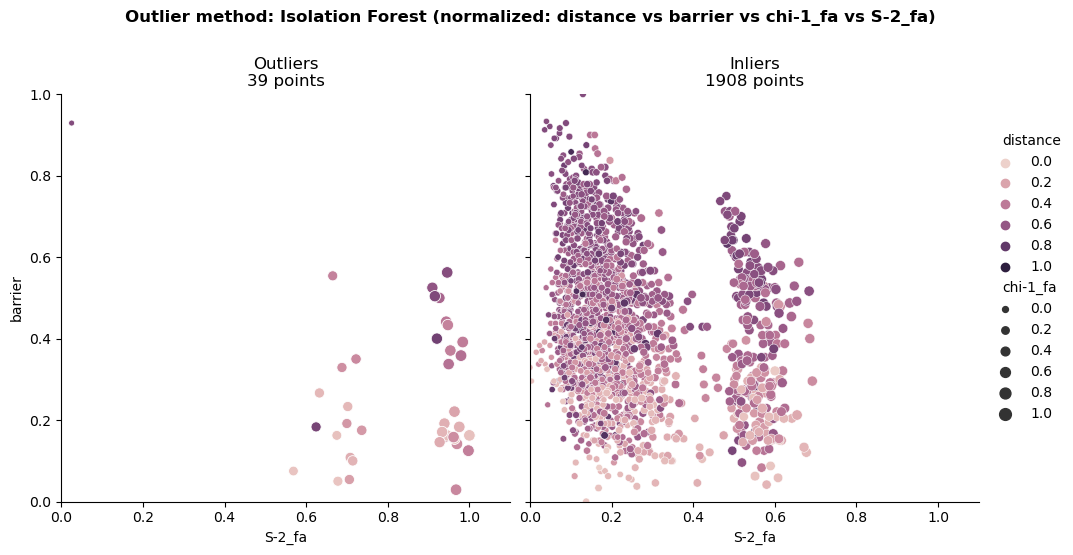

In [13]:
outlier_plot(scaled, "Isolation Forest", "S-2_fa", "barrier", "distance", "chi-1_fa", [0, 1.1], [0, 1])

The suitability of the outlier method is clearly sensitive to the underlying data-distribution. The clustered data in chi-1_fa and S-2_fa variables are identified as outliers more readily than any point on the distance vector due to their distribution (even if they probably are valid data points). The isolation forest algorithm seems suitable for detecting global outliers from an uniform data distribution, not local outliers from clustered data, as also mentioned in the pre-print: https://arxiv.org/abs/2305.00735 